<a href="https://colab.research.google.com/github/victorkaillo/network_Analysis/blob/main/Redes_voos_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nxviz

     |████████████████████████████████| 10.8 MB 132 kB/s 
     |████████████████████████████████| 10.3 MB 51.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import nxviz

# 1. Dataset: Brazil air traffic network

This repository contains several example network datasets. Among these is a network of Brazil air travel routes:

In [2]:
G = nx.read_graphml('/content/air_traffic.graphml')

In [3]:
# Filter to Brazil
nodesBrazil = [node for node, data in G.nodes(data=True) if data['country']=='BRASIL']
B = nx.subgraph(G, nodesBrazil)

The nodes in this graph are airports, represented by their [IATA codes](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_code:_A); two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges
```
[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]
```
where ANC is Anchorage, IAD is Washington Dulles, etc.

These nodes also have **attributes** associated with them, containing additional information about the airports:

In [4]:
B.nodes['SBIZ']

{'country': 'BRASIL',
 'latitude': -5.5305556,
 'longitude': -47.458333,
 'name': 'IMPERATRIZ'}

Node attributes are stored as a dictionary, so the values can be accessed individually as such:

In [5]:
B.nodes['SBIZ']['name']

'IMPERATRIZ'

It is possible to note the number of nodes and edges.

In [6]:
number_of_nodes_B = B.number_of_nodes()
number_of_nodes_G = G.number_of_nodes()

print('Number of nodes (B):', number_of_nodes_B)
print('Number of nodes (G):', number_of_nodes_G)
print('percent:', number_of_nodes_B / number_of_nodes_G)

Number of nodes (B): 495
Number of nodes (G): 1082
percent: 0.45748613678373384


In [7]:
number_of_edges_B = B.number_of_edges()
number_of_edges_G = G.number_of_edges()

print('Number of edges (B):', number_of_edges_B)
print('Number of edges (G):', number_of_edges_G)
print('percent:', number_of_edges_B / number_of_edges_G)

Number of edges (B): 4594
Number of edges (G): 9920
percent: 0.46310483870967745


# EXERCISE 1
 
Is there a direct flight between Imperatriz and Recife (SBRF)? A direct flight is one with no intermediate stops.

In [8]:
# put your code here
'SBIZ' in B.neighbors('SBRF')

True

# EXERCISE 2
 
If I wanted to fly from Imperatriz to Recife, what would be an itinerary with the fewest number of flights?

In [ ]:
# put your code here
nx.shortest_path(B, 'SBIZ', 'SBRF')

['SBIZ', 'SBRF']

# EXERCISE 3

Is it possible to travel from any airport in the Brazil to any other airport in the Brazil, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

In [9]:
# put your code here
nx.is_connected(B)

False

In [10]:
import folium

In [11]:
# Sort weights
edges_weight = sorted(B.edges(data=True), key= lambda edge: edge[2]['flight_count'], reverse=True)
 
# Get maximum weight
max_weight = edges_weight[0][2]['flight_count']
 
# Binds
quartile_1 = max_weight * 0.1
quartile_2 = max_weight * 0.2
quartile_3 = max_weight * 0.4

In [12]:
def weight_line(weight):
  if weight < quartile_1:
    return 0.1
  if weight < quartile_2:
    return 0.1
  if weight < quartile_3:
    return 1
  
  return 3

In [16]:
 
map = folium.Map(
    location=[-5.5305556, -47.458333],
    zoom_start=3,
    tiles='OpenStreetMap'
)
 
 
for code in B.nodes():
    node = B.nodes()[code]
    
    folium.Circle([node['latitude'], node['longitude']],
                  popup='<i>' + node['name'] + '</i>',
                  tooltip=code,
                  radius=5).add_to(map)
 
 
for edge in B.edges(data=True):
    node_first = B.nodes[edge[0]]
    node_second = B.nodes[edge[1]]
    loc = [
        (node_first['latitude'], node_first['longitude']),
        (node_second['latitude'], node_second['longitude']),
    ]
 
    folium.PolyLine(loc,
                    color='green',
                    weight=weight_line(edge[2]['flight_count']),
                    opacity=0.4).add_to(map)
 
map

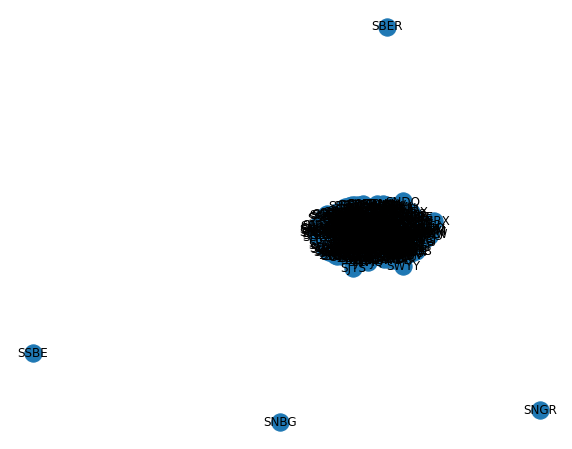

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

nx.draw_networkx(B,ax=ax)
ax.axis("off")
plt.show()

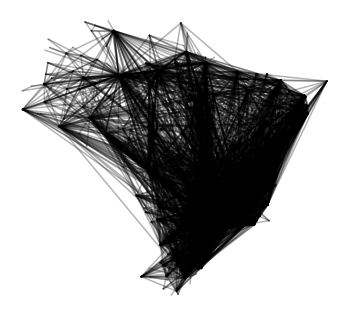

In [19]:
from nxviz import GeoPlot
b = GeoPlot(B,
            node_lat="latitude",
            node_lon="longitude",
            node_size=0.005,
  )

b.draw()

In [41]:
B.nodes['SNAT']['name']

'ARACATI'

In [60]:
# visualizando os aeroportos
def mostra_mapa_aeroporto(B, zoom):
  lat_map = 30.038557
  lon_map = 31.231781
  
  f = folium.Figure(width=1000, height=500)
  m = folium.Map([lat_map, lon_map], zoom_start=zoom).add_to(f)

  for i in B.nodes:
    html = '''Long:  ''' + str(B.nodes[i]['longitude']) + ''' Lat: ''' + str(B.nodes[i]['latitude']) + ''' <br>
    Country:  ''' + str(B.nodes[i]['country']) + ''' <br>
    City: ''' +  str(B.nodes[i]['name']) + ''' '''
    
    iframe = folium.IFrame(html,width=360,height=150)
    popup = folium.Popup(iframe,max_width=360)

    folium.Marker(location=[B.nodes[i]['latitude'], B.nodes[i]['longitude']],popup=popup,tooltip=B.nodes[i]['name'],icon=folium.Icon(icon_color='white', icon='plane', prefix='fa')).add_to(m)

  return m

In [61]:
mostra_mapa_aeroporto(B, 1)